In [ ]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)

# Enter IBM API Key here >> IBMQ.save_account("")
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

: 

In [ ]:
qc = QuantumCircuit(4, 4)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(2, 3)
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])
qc.draw();

: 

ibmq_qasm_simulator supports memory to see invidual results.
['0000', '1111', '1111', '1111', '0000', '0000', '0000', '0000', '0000', '1111', '0000', '0000', '0000', '0000', '1111', '1111', '1111', '1111', '1111', '0000', '1111', '1111', '1111', '0000', '1111', '0000', '0000', '1111', '0000', '1111', '1111', '0000', '1111', '1111', '1111', '0000', '1111', '0000', '0000', '1111', '0000', '1111', '1111', '0000', '0000', '0000', '1111', '0000', '1111', '1111', '1111', '0000', '0000', '0000', '1111', '0000', '1111', '1111', '1111', '1111', '0000', '0000', '1111', '1111', '1111', '1111', '1111', '0000', '0000', '1111', '0000', '0000', '0000', '0000', '1111', '0000', '1111', '1111', '0000', '1111', '1111', '0000', '1111', '0000', '0000', '0000', '1111', '0000', '0000', '1111', '0000', '1111', '0000', '1111', '0000', '0000', '1111', '1111', '1111', '0000', '0000', '1111', '0000', '0000', '0000', '0000', '0000', '1111', '0000', '0000', '0000', '1111', '1111', '1111', '1111', '0000', '0000', '1

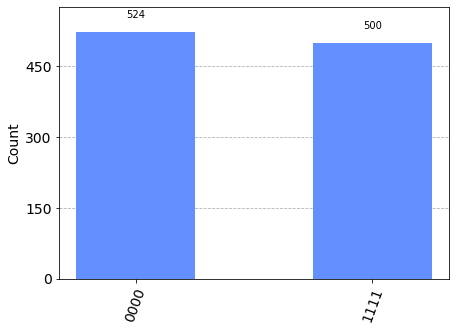

In [4]:

#use a real backend
backend = provider.get_backend('ibmq_qasm_simulator')

#check if this backend supports memory
if backend.configuration().memory :
    print(backend.name() + " supports memory to see invidual results.")
else:
    print(backend.name() + " does not support individual results... defaulting to ourense")
    
    
shots = 1024
job = execute(qc, backend, shots=shots, memory=True)

#we want to see results independently, instead of as a probability
result = job.result()
memory = result.get_memory()

# need an array to drop all the results into
outputArray = []

#convert results to int and drop into array
for x in range(0, shots):
#     converted = int(memory[x], 2)
    outputArray.append(memory[x])
    
print(outputArray)

plot_histogram(job.result().get_counts())